In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

In [23]:
df = pd.read_csv('crop_fertilizers.csv')
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [24]:
df.describe()


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,30.204878,58.990244,43.590244,18.814634,3.219512,18.634146
std,3.592882,5.973791,11.236665,11.273115,5.571778,13.494654
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,27.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,42.000000,14.000000,0.000000,18.000000
75%,33.000000,64.000000,51.000000,24.000000,7.000000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [25]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

<Axes: xlabel='Soil Type', ylabel='count'>

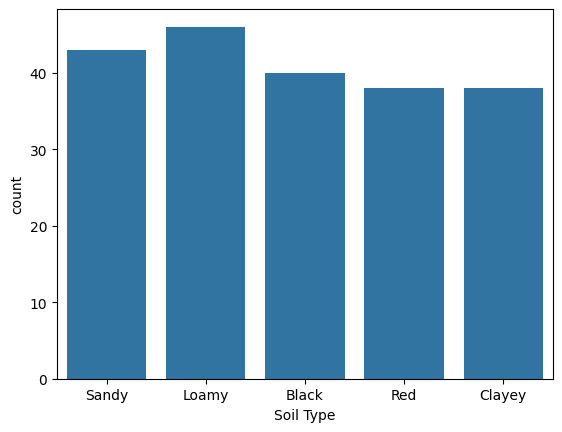

In [26]:
import seaborn as sns
sns.countplot(x='Soil Type', data = df)

<Axes: xlabel='Crop Type', ylabel='count'>

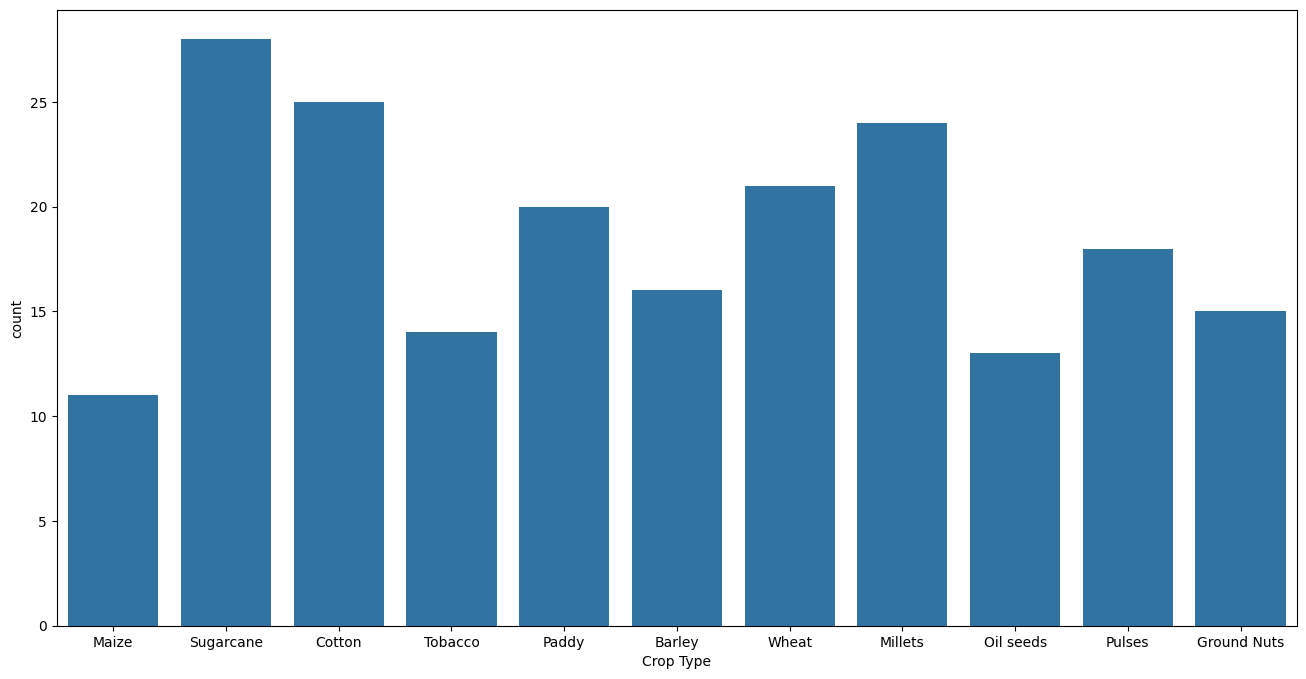

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(x='Crop Type', data = df)

<Axes: xlabel='Fertilizer Name', ylabel='count'>

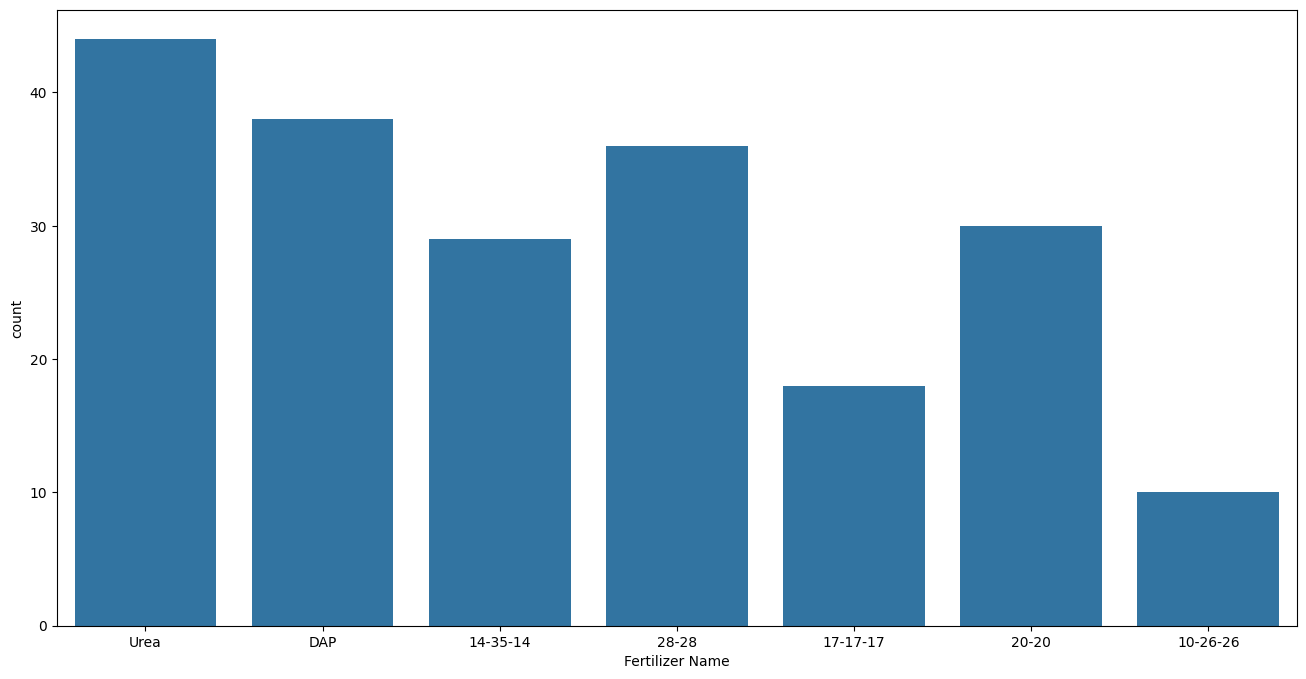

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer Name', data = df)

In [29]:
#Defining function for Continuous and catogorical variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = df['Fertilizer Name'])
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer Name'], ax=axes[1])

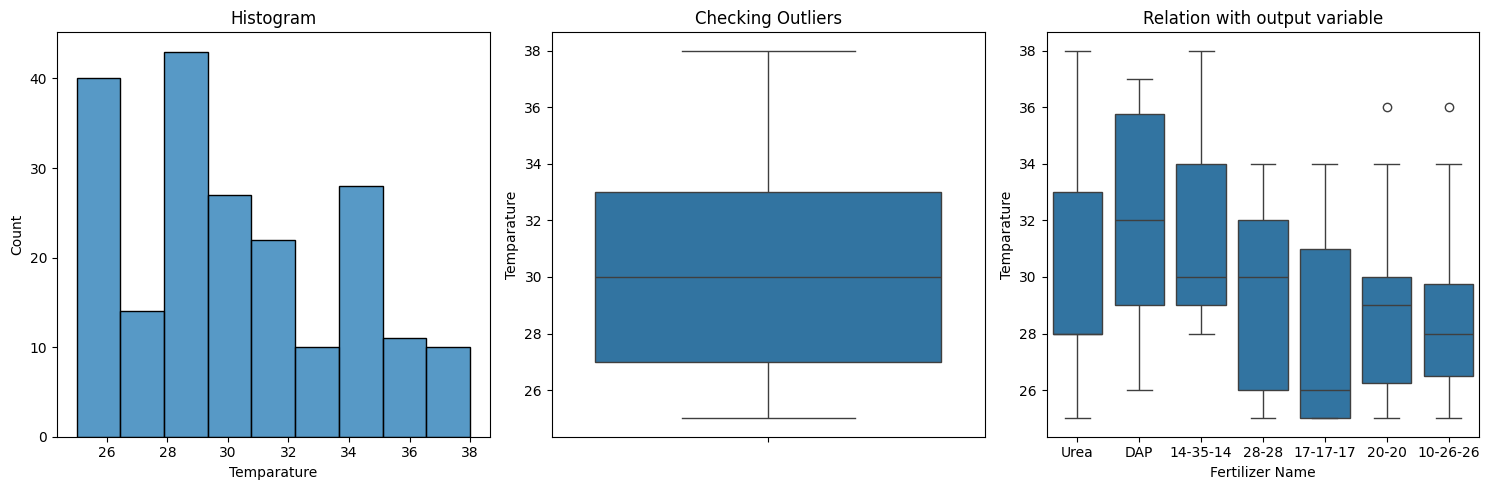

In [30]:
#EDA - Temparature variable
plot_conti(df['Temparature'])

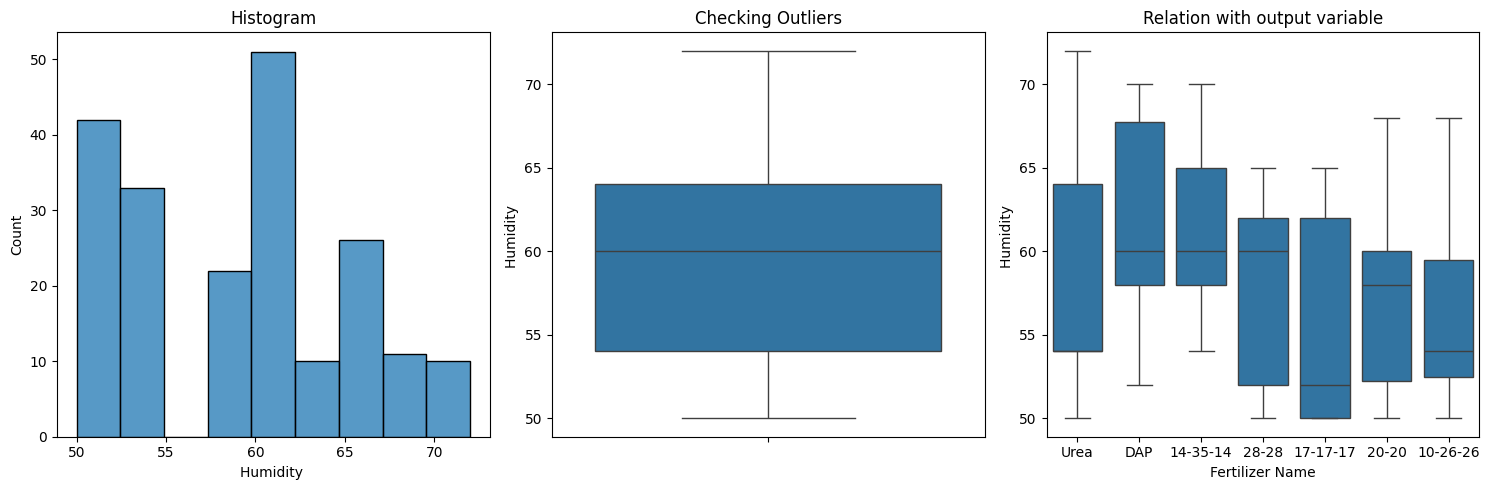

In [31]:
#EDA - Humidity variable
plot_conti(df['Humidity '])

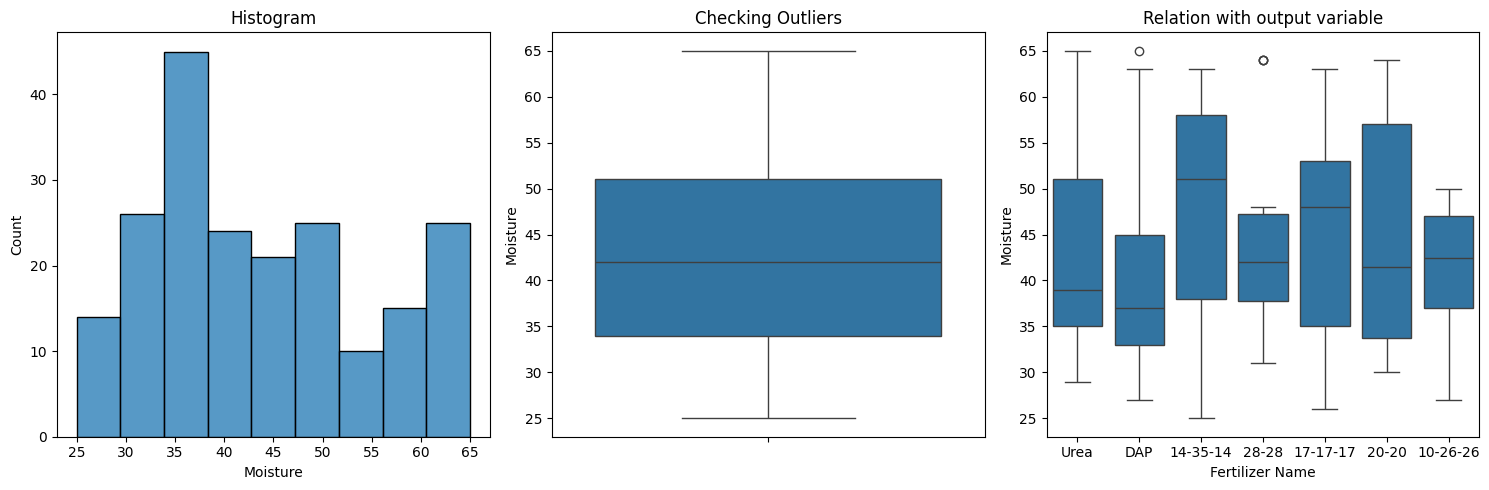

In [32]:
#EDA - Moisture variable
plot_conti(df['Moisture'])

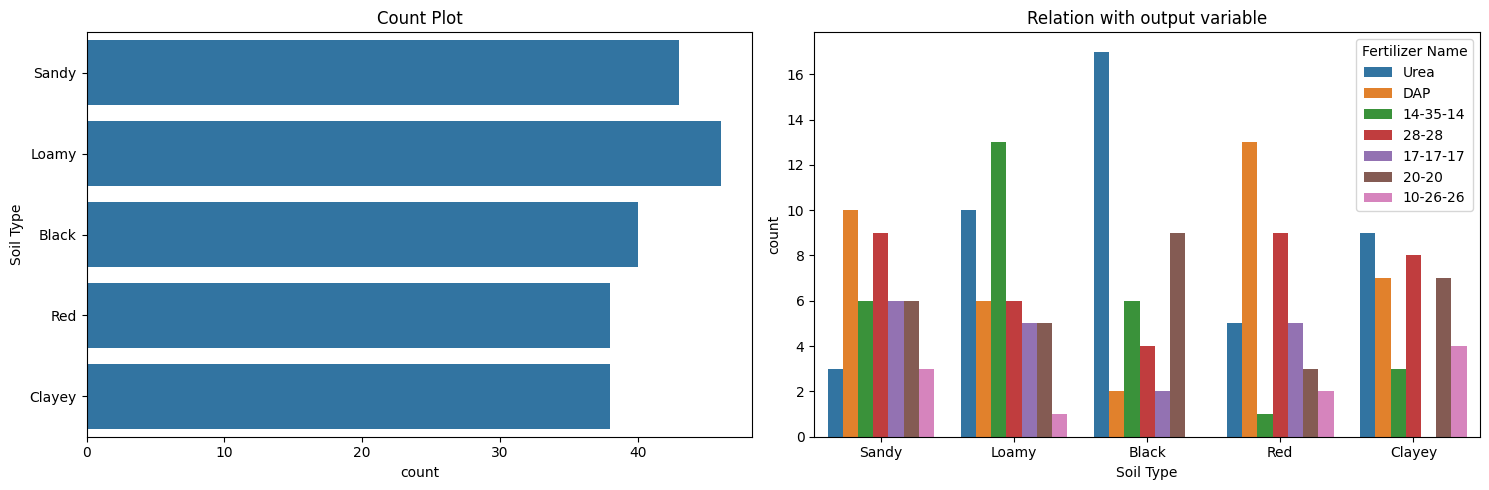

In [33]:
plot_cato(df['Soil Type'])

<Axes: xlabel='Soil Type', ylabel='Temparature'>

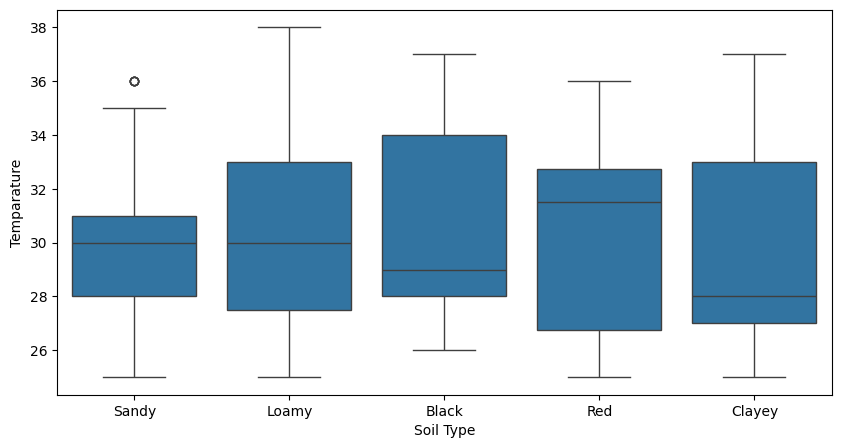

In [34]:
#relacion del tipo de suelo con la temperatura
 
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'])

<Axes: xlabel='Soil Type', ylabel='Temparature'>

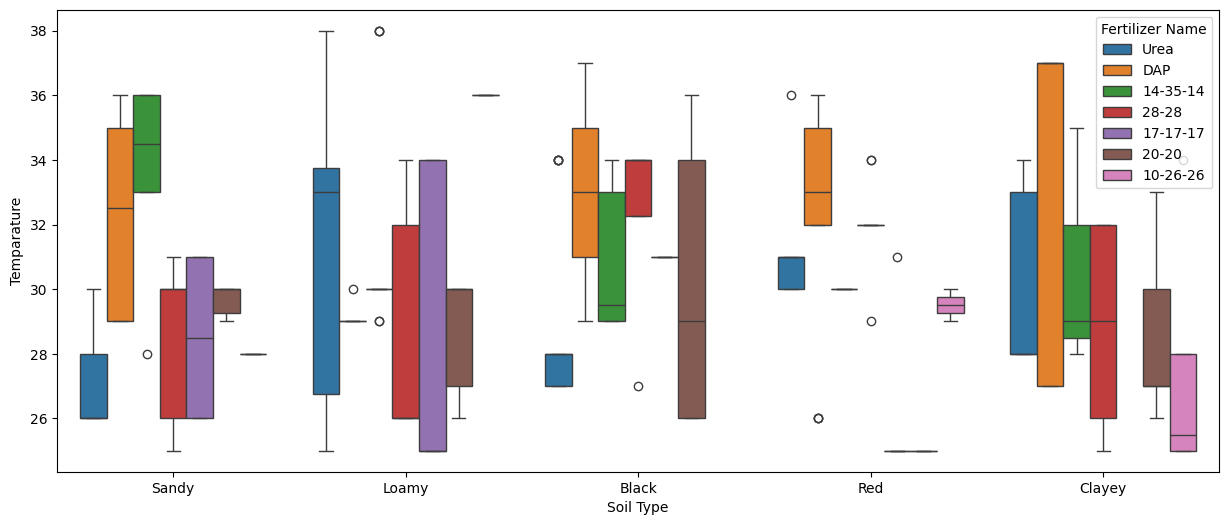

In [35]:
#Relacion del tipo de suelo y temperatura con variables de salida
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'],hue=df['Fertilizer Name'])

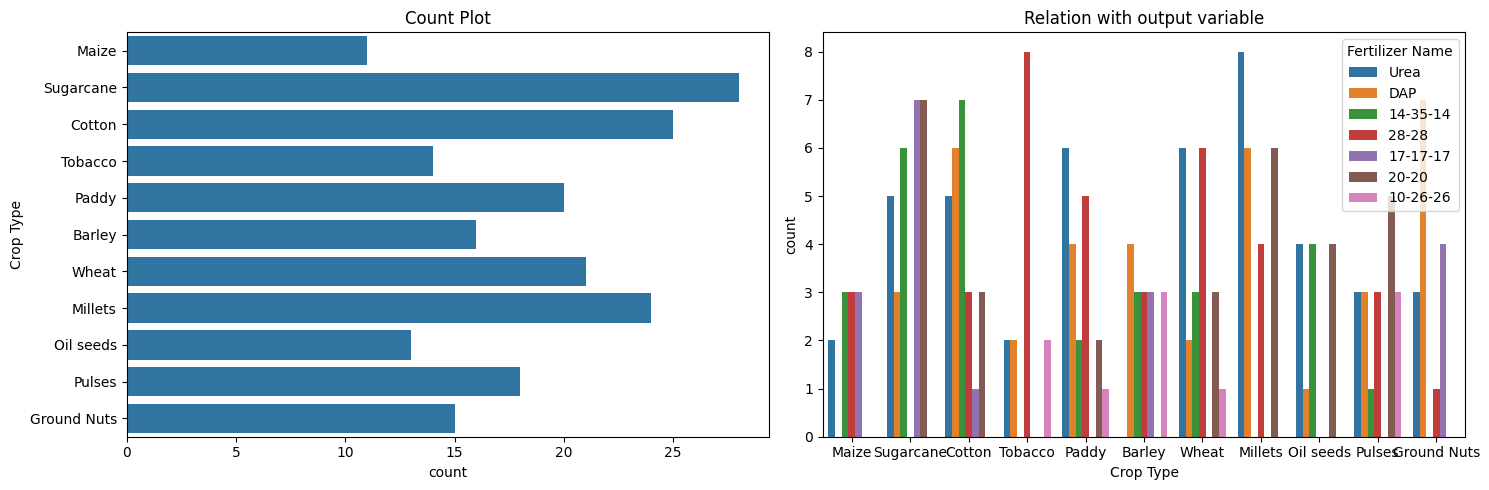

In [36]:
#EDA - Crop_Type variable
plot_cato(df['Crop Type'])

<Axes: xlabel='Crop Type', ylabel='Temparature'>

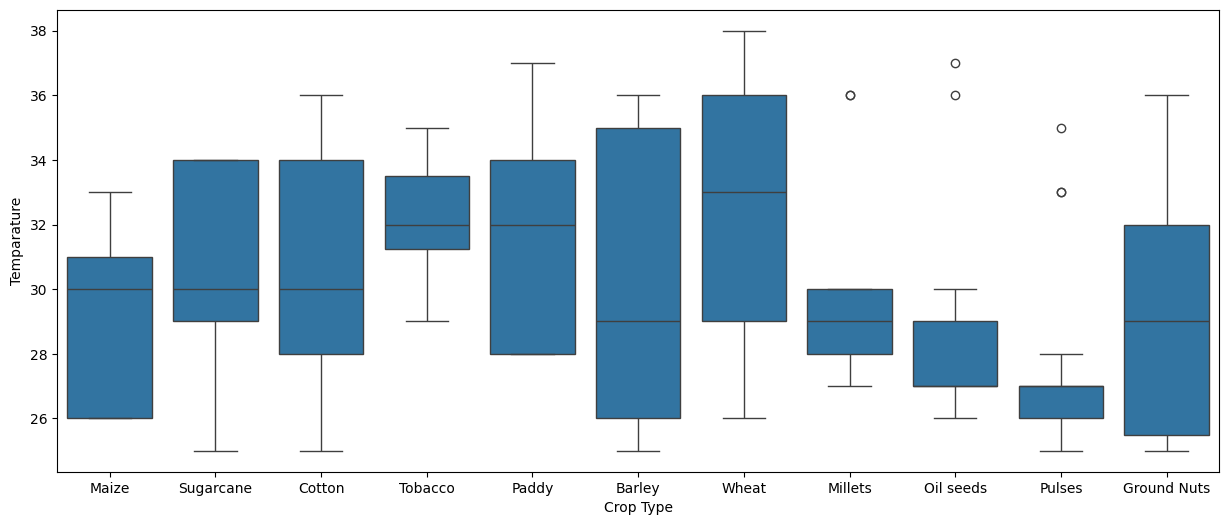

In [37]:
#relation of crop type with temperature
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Crop Type'],y=df['Temparature'])

<Axes: xlabel='Crop Type', ylabel='Humidity '>

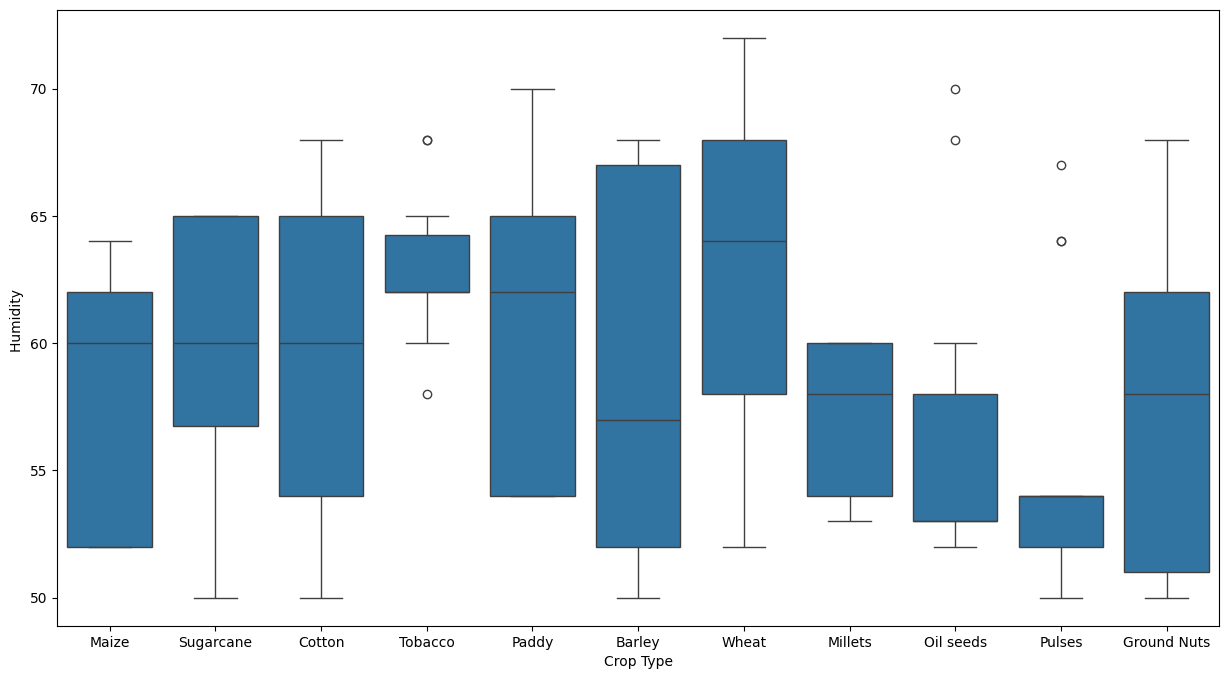

In [38]:
#relation of crop type with Humidity
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Humidity '])

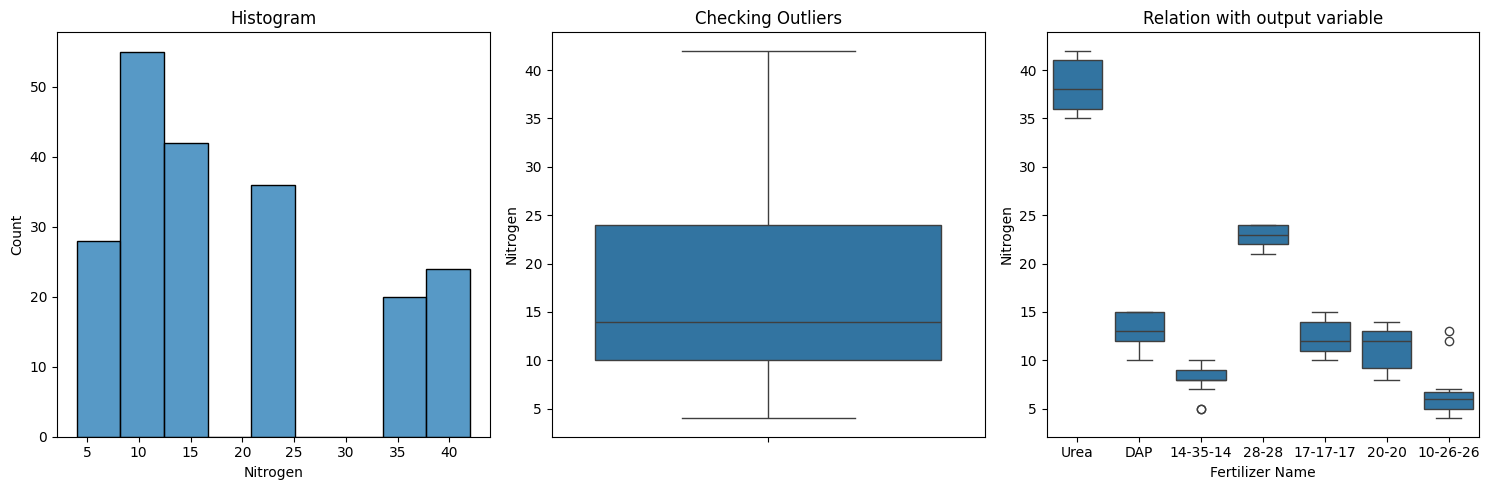

In [39]:
#EDA - Nitrogen variable
plot_conti(df['Nitrogen'])

<Axes: xlabel='Crop Type', ylabel='Nitrogen'>

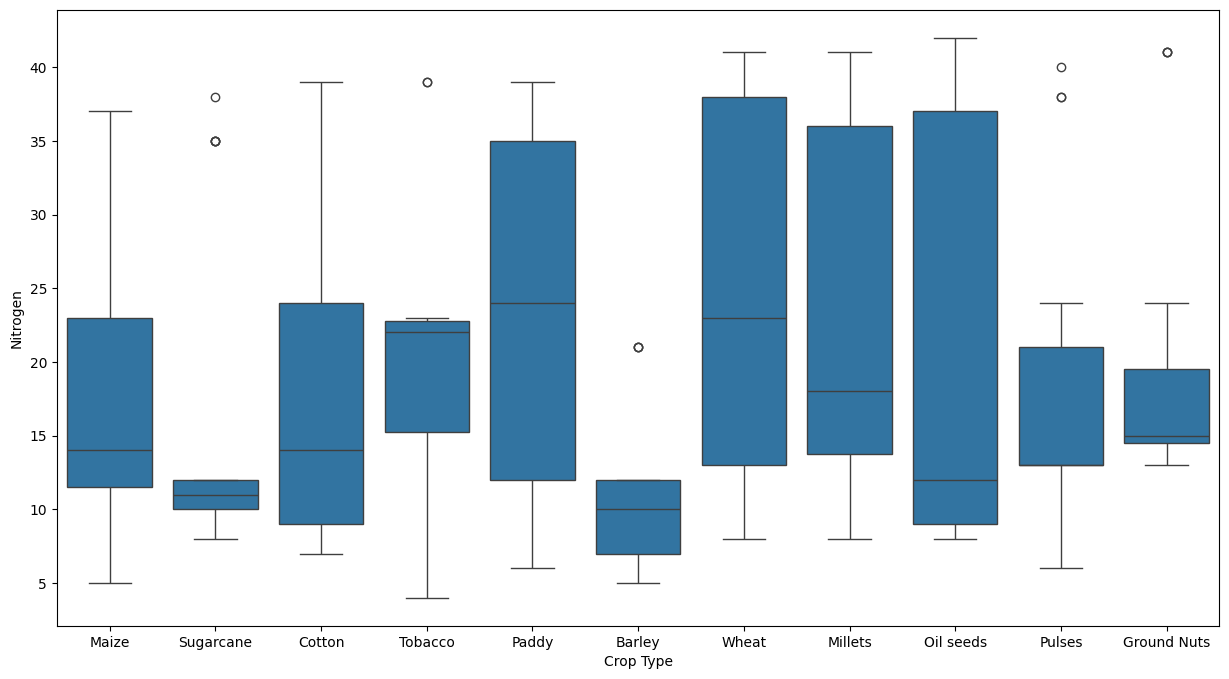

In [40]:
#relation of nitrogen wrt to crop type
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Nitrogen'])

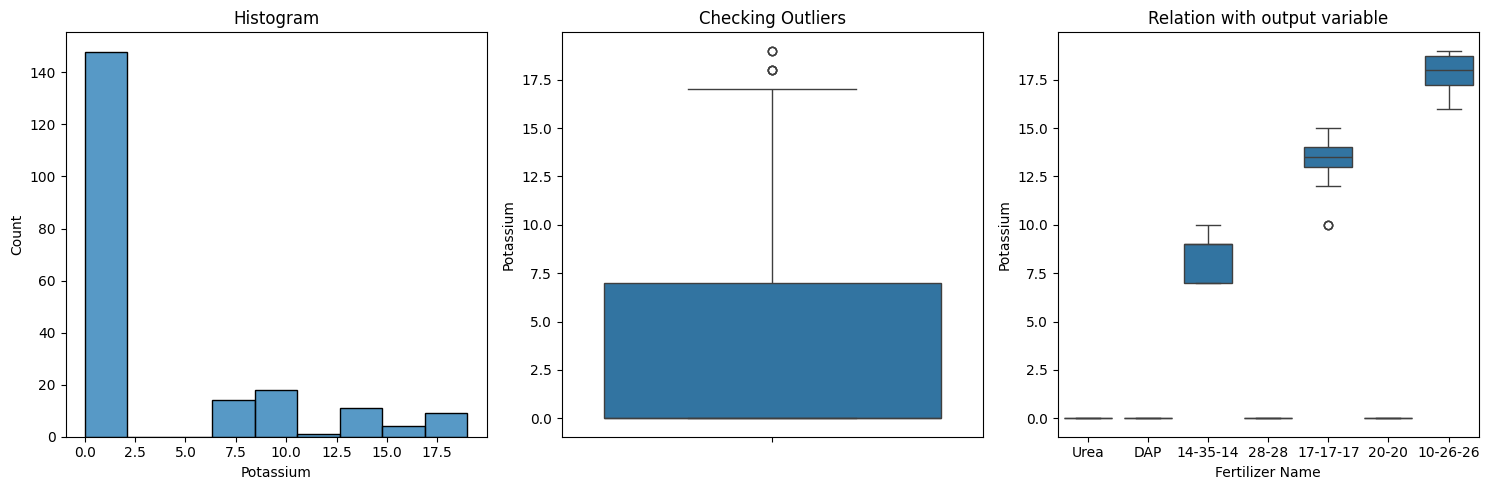

In [41]:
#EDA - Potassium variable
plot_conti(df['Potassium'])

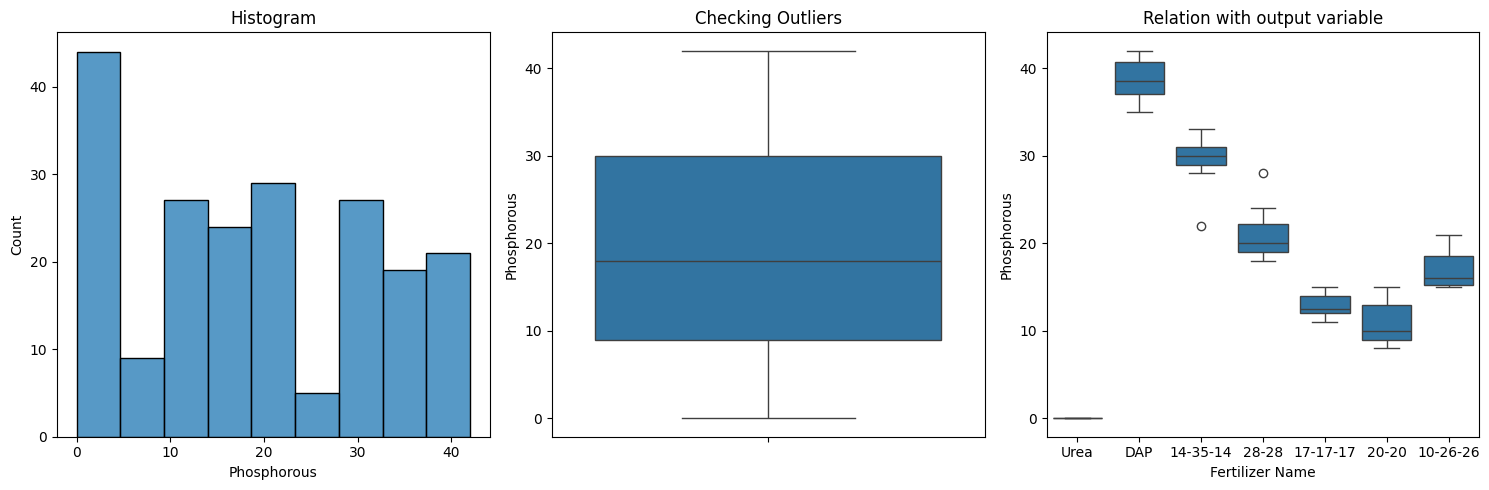

In [42]:
#EDA - Phosphorous variable
plot_conti(df['Phosphorous'])

In [43]:
#Preprocessing using One-Hot Encoder

In [44]:
y = df['Fertilizer Name'].copy()
X = df.drop('Fertilizer Name', axis=1).copy()

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [46]:
X[0]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., 26., 52., 38., 37.,  0.,  0.])

Train-test split

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)

Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
X_train[0]

array([-0.47140452, -0.47140452, -0.54772256,  1.98268366, -0.5043669 ,
       -0.28867513, -0.40323892, -0.27420425, -0.19034675, -0.39144068,
       -0.25916053, -0.3423266 , -0.28867513, -0.40323892,  3.30403793,
       -0.28867513,  0.45302544,  0.4515208 , -0.86503469,  0.29249386,
       -0.54135162,  0.344696  ])

Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred = classifier.predict(X_test)

Creating confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 3  0  1  0  0  0  0]
 [ 0  8  0  0  0  0  0]
 [ 0  0  9  0  0  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0 13]]


0.9838709677419355

In [54]:
classifier.score(X_test, y_test)

0.9838709677419355

Preprocessing using Label Encoder

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
#encoding Soil Type variable
encode_soil = LabelEncoder()
df['Soil Type'] = encode_soil.fit_transform(df['Soil Type'])

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [57]:
encode_crop =  LabelEncoder()
df['Crop Type'] = encode_crop.fit_transform(df['Crop Type'])

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [58]:
encode_ferti = LabelEncoder()
df['Fertilizer Name'] = encode_ferti.fit_transform(df['Fertilizer Name'])

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [59]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Fertilizer Name',axis=1),df['Fertilizer Name'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (164, 8), y_train = (164,), x_test = (41, 8), y_test = (41,)


In [60]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 106 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  164 non-null    int64
 1   Humidity     164 non-null    int64
 2   Moisture     164 non-null    int64
 3   Soil Type    164 non-null    int32
 4   Crop Type    164 non-null    int32
 5   Nitrogen     164 non-null    int64
 6   Potassium    164 non-null    int64
 7   Phosphorous  164 non-null    int64
dtypes: int32(2), int64(6)
memory usage: 10.2 KB


Random Forest Classifier

In [61]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [62]:
pred_rand = rand.predict(x_test)

#Hyperparameter tuning with GridSearch

The performance of a model significantly depends on the value of hyperparameters. Grid Search is the process of performing hyperparameter tuning in order to determine the optimal values for a given model.

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        10

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

Best score :  0.9878787878787879
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [64]:
y_train[2]

1

In [65]:
#pickling the file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [66]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [67]:
model = pickle.load(open('classifier.pkl','rb'))
ans = model.predict([[34,65,62	,0,	1,	7,	9,	30]])
if ans[0] == 0:
    print("10-26-26")
elif ans[0] ==1:
    print("14-35-14")
elif ans[0] == 2:
    print("17-17-17	")
elif ans[0] == 3:
    print("20-20")
elif ans[0] == 4:
    print("28-28")
elif ans[0] == 5:
    print("DAP")
else:
    print("Urea")

14-35-14
